# Real Estate-price predictor

In [1]:
import pandas as pd


In [2]:
housing= pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     503 non-null    float64
 1   ZN       503 non-null    float64
 2    INDUS   503 non-null    float64
 3   CHAS     503 non-null    int64  
 4    NOX     503 non-null    float64
 5   RM       503 non-null    float64
 6   AGE      503 non-null    float64
 7   DIS      503 non-null    float64
 8   RAD      503 non-null    int64  
 9   TAX      503 non-null    int64  
 10  PTRATIO  503 non-null    float64
 11  B        503 non-null    float64
 12  LSTAT    503 non-null    float64
 13  MEDV     503 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.1 KB


In [5]:
housing['CHAS'].value_counts()

0    468
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000,503.000000
mean,1.725145,11.431412,11.168628,0.069583,0.555091,6.282930,68.577734,3.786880,9.588469,409.139165,18.451292,356.481292,12.689761,22.504970
std,2.658844,23.375438,6.865424,0.254695,0.116077,0.703484,28.218484,2.108693,8.718234,168.609418,2.168204,91.531641,7.143408,9.202357
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082100,0.000000,5.190000,0.000000,0.449000,5.884500,44.700000,2.094100,4.000000,279.500000,17.350000,375.270000,7.065000,16.900000
50%,0.251990,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.182700,5.000000,330.000000,19.100000,391.430000,11.410000,21.200000
75%,2.349805,12.500000,18.100000,0.000000,0.624000,6.622000,94.100000,5.164950,24.000000,666.000000,20.200000,396.235000,17.025000,25.000000
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
##  for plotting histogram
#  import matplotlib.pyplot as plt
#  housing.hist(bins=50, figsize=(20,15))

## Train-test splitting

In [9]:
#for learning purpose
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled) 
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
#train_set, test_set = split_train_test(housing, 0.2)

In [11]:
#print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 402
Rows in test set: 101



In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing,housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
        

In [14]:
strat_test_set['CHAS'].value_counts()

0    94
1     7
Name: CHAS, dtype: int64

In [15]:
strat_train_set['CHAS'].value_counts()

0    374
1     28
Name: CHAS, dtype: int64

In [16]:
#95/7

In [17]:
#376/28

# Looking for correlations

In [18]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.694349
ZN         0.363053
B          0.333041
DIS        0.248309
CHAS       0.176550
CRIM      -0.361153
AGE       -0.376361
RAD       -0.380505
 NOX      -0.425959
TAX       -0.467340
 INDUS    -0.483072
PTRATIO   -0.508022
LSTAT     -0.737132
Name: MEDV, dtype: float64

array([[<AxesSubplot: xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot: xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot: xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot: xlabel='RM', ylabel='RM'>,
        <AxesSubplot: xlabel='ZN', ylabel='RM'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot: xlabel='RM', ylabel='ZN'>,
        <AxesSubplot: xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot: xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

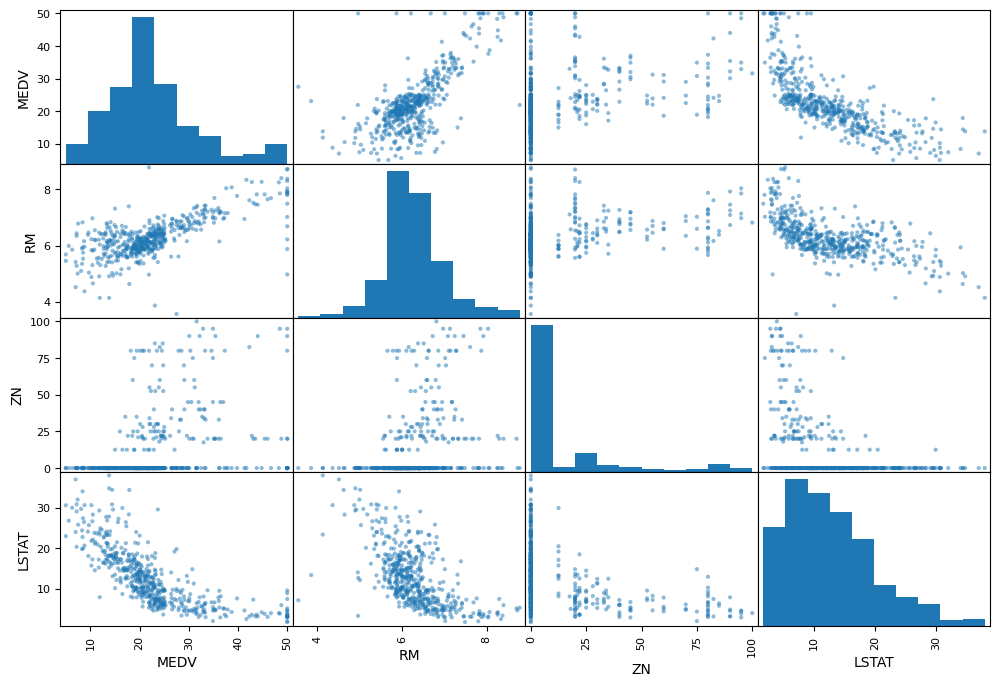

In [19]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM","ZN","LSTAT"]
scatter_matrix(housing[attributes], figsize = (12,8))

<AxesSubplot: xlabel='RM', ylabel='MEDV'>

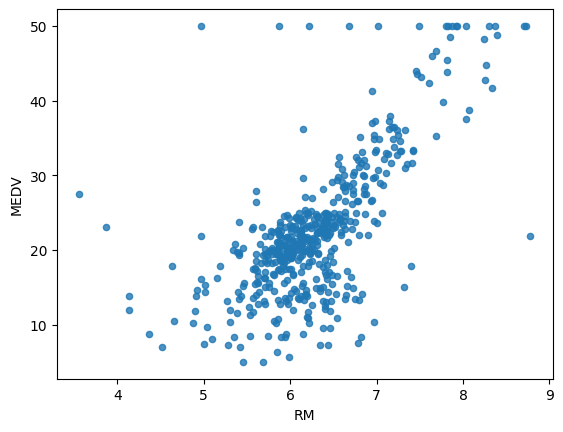

In [20]:
housing.plot(kind= "scatter", x="RM", y="MEDV", alpha=0.8)

# Trying out attribute combinations

In [21]:
housing["TAXRM"]= housing['TAX']/housing['RM']

In [22]:
housing["TAXRM"]

0      45.019011
1      37.688834
2      31.723350
3      31.061984
4      51.729874
         ...    
498    41.407553
499    44.607843
500    39.134174
501    40.182514
502    45.273632
Name: TAXRM, Length: 503, dtype: float64

In [23]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,51.729874


In [24]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.694349
ZN         0.363053
B          0.333041
DIS        0.248309
CHAS       0.176550
CRIM      -0.361153
AGE       -0.376361
RAD       -0.380505
 NOX      -0.425959
TAX       -0.467340
 INDUS    -0.483072
PTRATIO   -0.508022
TAXRM     -0.536588
LSTAT     -0.737132
Name: MEDV, dtype: float64

<AxesSubplot: xlabel='TAXRM', ylabel='MEDV'>

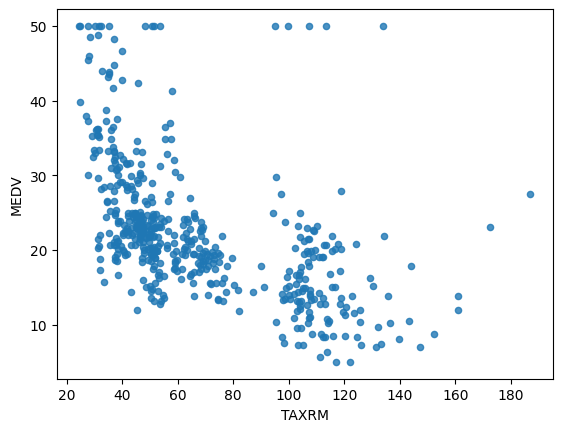

In [25]:
housing.plot(kind= "scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [26]:
housing= strat_train_set.drop('MEDV',axis=1)
housing_labels=strat_train_set['MEDV'].copy()

# Missing Attributes

To take care of missing attributes
1. Get rid of missing data points
2. get rid of whole attribute
3. Set the value to some value(0,mean or median)

In [27]:
housing.dropna(subset=["RM"]).shape
#original dataframe is unchanged


(402, 13)

In [28]:
housing.drop("RM", axis=1).shape
#original dataframe is unchanged

(402, 12)

In [29]:
median= housing["RM"].median()
#original dataframe is unchanged

In [30]:
housing["RM"].fillna(median)
#original dataframe is unchanged

15     5.456
96     7.416
451    6.728
189    7.178
200    7.853
       ...  
266    5.920
162    6.101
319    6.041
142    6.130
208    5.404
Name: RM, Length: 402, dtype: float64

In [31]:
housing.shape

(402, 13)

In [32]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy='median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [33]:
imputer.statistics_

array([2.68880e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.18900e+00, 7.77000e+01, 3.20745e+00, 5.00000e+00, 3.34000e+02,
       1.91000e+01, 3.91305e+02, 1.18450e+01])

In [34]:
x= imputer.transform(housing)

In [35]:
housing_tr= pd.DataFrame(x, columns= housing.columns)

In [36]:
housing_tr.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000
mean,1.752080,10.757463,11.327463,0.069652,0.557395,6.267846,68.594776,3.766026,9.699005,412.074627,18.513682,354.563856,12.890149
std,2.653298,22.404555,6.793997,0.254876,0.118128,0.700472,27.954984,2.098689,8.789103,168.249101,2.110332,92.782886,7.288334
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.090658,0.000000,5.222500,0.000000,0.449000,5.877250,45.225000,2.091150,4.000000,284.000000,17.400000,374.597500,7.205000
50%,0.268880,0.000000,9.900000,0.000000,0.538000,6.189000,77.700000,3.207450,5.000000,334.000000,19.100000,391.305000,11.845000
75%,2.379148,12.500000,18.100000,0.000000,0.629250,6.592250,93.875000,5.117675,24.000000,666.000000,20.200000,396.172500,17.117500
max,9.966540,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


# Scikit-learn Design

Primarily, three types of objects
1. Estimators
2. Transformers
3. Predictors

# Feature Scaling

 Primarily, Two types of Feature Scaling methods:
 1. Min-max scaling
     (value-min)/(max-min)
     Sklearn provides a class called MinMaxScaler
     
 2. Standardization
     (value-mean)/std 
     Sklearn provides a class called StandardScaler
 


# Creating a Pipeline

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

my_pipeline= Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
 #....add as many as you want in pipeline
    ('std_scaler', StandardScaler())
])


In [38]:
housing_num_tr = my_pipeline.fit_transform(housing_tr)

In [39]:
housing_num_tr.shape

(402, 13)

# Selecting a desired model for Real Estate

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model= LinearRegression()
#model= DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [41]:
some_data= housing.iloc[:5]

In [42]:
some_labels= housing_labels.iloc[:5]

In [43]:
prepared_data= my_pipeline.transform(some_data)

In [44]:
model.predict(prepared_data)

array([19.392, 33.78 , 14.3  , 36.254, 48.397])

In [45]:
list(some_labels)

[20.2, 33.2, 14.9, 36.4, 48.5]

## Evaluating the model 

In [46]:
from sklearn.metrics import mean_squared_error
housing_predictions= model.predict(housing_num_tr)
lin_mse=mean_squared_error(housing_labels,housing_predictions)
lin_rmse= np.sqrt(lin_mse)

In [47]:
lin_mse

1.4559602039800994

In [48]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn. model_selection import cross_val_score
scores= cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores= np.sqrt(-scores)

In [49]:
rmse_scores

array([3.44399635, 2.54173814, 5.02569431, 2.69983112, 3.0213383 ,
       2.48191762, 7.08616532, 2.59895165, 2.98579496, 3.15207145])

In [50]:
def print_scores(scores):
    print("scores:", scores)
    print("mean:", scores.mean())
    print("standard deviation:", scores.std())
    

In [51]:
print_scores(rmse_scores)

scores: [3.44399635 2.54173814 5.02569431 2.69983112 3.0213383  2.48191762
 7.08616532 2.59895165 2.98579496 3.15207145]
mean: 3.503749921927265
standard deviation: 1.3861029762002752


# Saving the model

In [52]:
from joblib import dump,load
dump(model,'Realestate')

['Realestate']

# Testing the model on test data

In [53]:
x_test= strat_test_set.drop("MEDV", axis=1)
y_test= strat_test_set["MEDV"].copy()
x_test_prepared= my_pipeline.transform(x_test)
final_predictions= model.predict(x_test_prepared)
final_mse= mean_squared_error(y_test,final_predictions)
final_rmse= np.sqrt(final_mse)
print(final_predictions,list(y_test))

[32.401 22.761 23.485 23.339 21.387 27.686 10.314 19.362 25.911 20.391
 31.273 22.226 22.943 22.231 34.762 22.375 11.231 45.343 21.339 18.878
 19.158 33.796 34.361 15.787 20.656 20.882 23.444 19.746 22.981 35.268
 20.048 19.222 18.62  14.923 23.354 15.032 22.084 21.178 32.972 34.839
 32.501 19.642 20.262 24.789 16.372  7.021 36.37  24.536 22.185 20.326
 22.095 30.141 14.835  7.205 18.58  29.84  27.685 34.764 33.871 23.313
 13.858 20.935 21.351 20.097 12.419 27.326 26.245 24.815  7.834 25.804
  7.657 43.756 16.095 22.645 26.312 17.355  9.003 21.133 44.607 30.104
 42.236 22.695 19.068 10.954 12.846 13.589 23.179 32.376 32.697 46.844
 25.788 31.283 13.845 23.194  9.417 25.431 19.52  19.591 26.818 20.486
 20.523] [30.3, 23.2, 22.9, 22.6, 21.7, 26.6, 8.1, 18.5, 22.0, 21.5, 35.1, 20.6, 23.0, 24.1, 32.9, 20.5, 10.9, 37.6, 23.1, 19.5, 16.0, 31.5, 35.4, 14.5, 18.6, 21.0, 21.6, 19.5, 22.2, 33.4, 19.0, 17.1, 21.7, 15.2, 28.7, 13.1, 19.1, 21.2, 15.0, 29.0, 33.1, 18.8, 19.8, 24.8, 15.6, 10.5, 36.0,

In [54]:
final_rmse

3.696415632034969

In [55]:
prepared_data[0]

array([-0.35825362, -0.48074454, -0.46974328, -0.27361709, -0.16439335,
       -1.16044209, -1.14593679,  0.01453841, -0.64922514, -0.62529642,
        1.17963243, -0.70762584, -0.16487235])

# Using the Model

In [57]:
from joblib import dump,load
import numpy as np
model= load('RealEstate')
features= np.array([[-0.35825362, -0.48074454, -0.46974328, -0.27361709, -0.16439335,
       -1.16044209, -1.14593679,  0.01453841, -0.64922514, -0.62529642,
        1.17963243, -0.70762584, -0.16487235]])
model.predict(features)

array([19.392])